In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import glob

import os 
cwd = os.getcwd()

In [4]:
# This turns a basic .csv into a text file that can be read by the IRSA website

file_in = open(cwd +'/Data/LIRG_sample_coords.csv','r')
# change below to 'w' if you need to run this again
file_out = open(cwd + '/Data/LIRG_sample_coords_DEG.tbl','r')
file_out.write('|   ra      |    dec    |\n')
file_out.write('|   double  |    double |\n')
i=0
for line in file_in :
    # Do not run unless needed, you have to do some annoying manual edits to get IRSA to read it
    break
    line = line[0:-2]
    line_list = line.split(',')
    coords = SkyCoord(line_list[0],line_list[1], frame='icrs', unit=(u.hourangle, u.deg))
    #coords.
    #print(coords.ra.deg,coords.dec.deg)
    file_out.write(' ' + str(np.round(coords.ra.deg,5)) + '      '  + str(np.round(coords.dec.deg,5)) + '\n')
    #i = i+1
    #if i >5 :
    #    break
    
file_out.close()

In [98]:
# Output from the IRSA website has all the LIRG data. This splits it into individual text files corresponding 
# to the individual LIRGS so they are easier to parse.

# Have to link the numbers to names.
gal_dict = {}
galnames_file = open(cwd + '/Data/WISE_gal_data/gal_names.txt','r')
for i in range(1,145):
    i =str(i)
    gal_dict[i]=galnames_file.readline()[0:-1]
#print(gal_dict)    
galnames_file.close()    

WISE_gals = open(cwd + '/Data/WISE_data_all_LIRGS_10arcsec.tbl','r')
index_old = 0
firstline = ''
for line in WISE_gals :
    line_list = line.split()
    if '\\' in line:
        continue
    if '|' in line :
        firstline = firstline + line
        continue
    #print(line_list)
    index = line_list[0]
    #print(index)
    if index == index_old :
        text_out.write(line)
    elif index != '1' :
        text_out.close()
        text_out = open(cwd +'/Data/WISE_gal_data/WISE_gal_' +  gal_dict[index] + '.tbl','w')
        text_out.write(firstline)
        text_out.write(line)
    elif index == '1' :
        text_out = open(cwd + '/Data/WISE_gal_data/WISE_gal_' + gal_dict[index] + '.tbl','w')
        text_out.write(firstline)
        text_out.write(line)
    index_old = line_list[0]
#     if index == '3' :
#         break
        

In [ ]:
#If you need help!
#help(WISE.WISE_Data)

/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_IRASF03359+1523.tbl IRASF03359+1523
IRASF03359+1523: No good data!
IRASF03359+1523: No good data!
IRASF03359+1523: No good data!
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_UGC01845.tbl UGC01845
UGC01845: No good data!
UGC01845: No good data!
UGC01845: No good data!
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC5734.tbl NGC5734
NGC5734: No good data!
NGC5734: No good data!
NGC5734: No good data!
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC6745.tbl NGC6745
10.89103541678299


/home/treynolds/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/treynolds/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/treynolds/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/treynolds/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


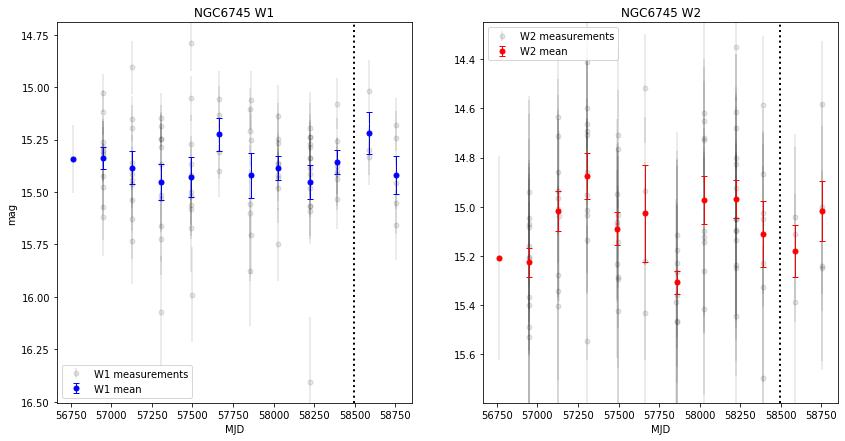

/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_CGCG049057.tbl CGCG049057
0.0


/home/treynolds/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/treynolds/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/treynolds/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/treynolds/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


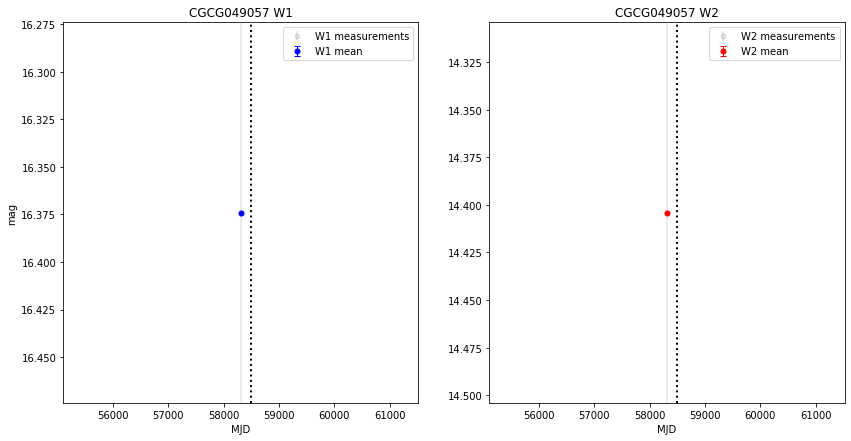

1


In [112]:
#Lets process the data in a succint way

from importnb import Notebook
from importlib import reload
with Notebook(): 
        import WISE_function_module as WISE
with Notebook(): __name__ == '__main__' and reload(WISE)
        

data_files = glob.glob(cwd + '/Data/WISE_gal_data/WISE*.tbl')
#print(data_files)
gals = {}
for item in data_files :
    # Uncomment lines if you want more processing, but it will start to get heavy
    source = item.split('_')[-1][0:-4]
    print(item,source)
    galaxy = WISE.WISE_Data(item,source=source,allowed_sep=2)
    #galaxy.position_diag()
    #galaxy.phot_diag()
    galaxy.filter_data()
    galaxy.bin_data(plot='no')
    #galaxy.plot_data()
    #galaxy.write()
    #gals[source] = galaxy


print(len(galaxy.data['w1mag']))

{'IRASF03359+1523': <WISE_function_module.WISE_Data object at 0x7f684abd7ba8>, 'UGC01845': <WISE_function_module.WISE_Data object at 0x7f684a61fd30>, 'NGC5734': <WISE_function_module.WISE_Data object at 0x7f684a8a29b0>, 'NGC6745': <WISE_function_module.WISE_Data object at 0x7f684a8a2438>, 'CGCG049057': <WISE_function_module.WISE_Data object at 0x7f684aa13710>}


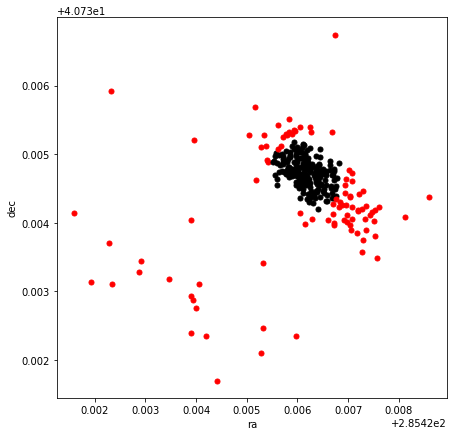

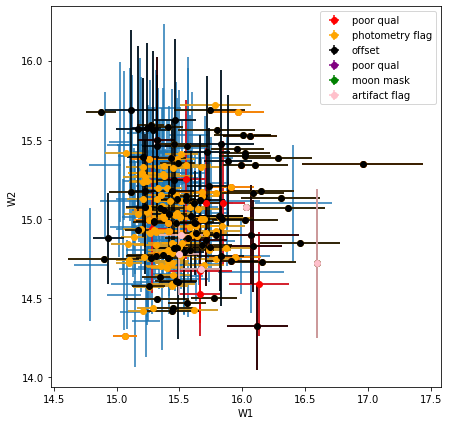

In [117]:
#print(gals)

gal = gals['NGC6745']
gal.position_diag()
gal.phot_diag()